## Figure 4 - chemical datasets, new-cell-line split

In [47]:
##Here we have code to replicate figures included in Figure 3 of main paper
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os.path as osp
from glob import glob
import sys
sys.path.append('../')
from constants import *
import os
import numpy as np
from scipy import stats
import networkx as nx
import pickle
import torch

outdir = 'processed'
os.makedirs(outdir, exist_ok = True)

In [48]:
base_path = '../../results_metrics_aggregated_bme/perturbagen_pred'

In [49]:
##########
#Mechanistic baselines 
##########

#############Recomputed with new mechanistic results 

# Initialize an empty dictionary
performance = {}
selector = {'cancer_genes': 'Cancer genes',
            'cancer_targets': 'Cancer targets',
            'random': 'Random',
            'perturbed_genes': 'Perturbed genes'
            }
path = osp.join(base_path, 'baselines/v2/mechanistic/new_cell_line/baseline_all_chemical_cross_v2.xlsx')
df = pd.read_excel(path, engine='openpyxl')

# Replace Type values using the selector dictionary
df['Type'] = df['Type'].map(selector)


# Group the DataFrame by Cellline_test, Metric, and Type
grouped = df.groupby(['Cellline_test', 'Metric', 'Type'])

# Iterate over the grouped data
for (test, metric, type_), group in grouped:
    if metric == 'ranking score - DCG':
        metric = 'nDCG'
    if test not in performance:
        performance[test] = {}
    if metric not in performance[test]:
        performance[test][metric] = {}
    performance[test][metric][type_] = group.sort_values('Cellline_train')['Mean'].tolist()
    


In [50]:
performance['A549'].keys()

dict_keys(['percentage of samples with partially accurate predictions', 'ranking score', 'nDCG', 'recall@1', 'recall@10', 'recall@100', 'recall@1000'])

In [51]:
##########
#Biolord
##########
paths = glob(osp.join(base_path, 'v2/Biolord/chemical/cross/biolord_chemical_*.csv'))

for path in paths:
    df = pd.read_csv(path)
    # Process the new DataFrame to update the dictionary
    method_name = 'Biolord'

    # List the columns for which you want to compute the mean
    columns_of_interest = ['recall_at_1', 'recall_at_10', 'recall_at_100', 
                        'recall_at_1000', 'rankings', 'perc_partially_accurate_predictions', 'Ranking_DCG' ]

    # Group by 'cellline2' and calculate the mean for the specified columns
    df_grouped = df.groupby('cellline2')[columns_of_interest].mean().reset_index()

    # Iterate over the rows of the new DataFrame
    for _, row in df_grouped.iterrows():
        cellline = row['cellline2']
        
        metric_data = {
            'recall@1': row['recall_at_1'],
            'recall@10': row['recall_at_10'],
            'recall@100': row['recall_at_100'],
            'recall@1000': row['recall_at_1000'],
            'percentage of samples with partially accurate predictions': row['perc_partially_accurate_predictions'],
            'rankings': row['rankings'],
            'nDCG': row['Ranking_DCG']
            
        }
        
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name].append(value)

In [52]:
##########
#CellOT
##########

paths = glob(osp.join(base_path, 'v2/cellot/chemical/cross/cellot_chemical_*.csv'))

for path in paths:
    df = pd.read_csv(path)
    # Process the new DataFrame to update the dictionary
    method_name = 'CellOT'

    # List the columns for which you want to compute the mean
    columns_of_interest = ['recall_at_1', 'recall_at_10', 'recall_at_100', 
                        'recall_at_1000', 'rankings', 'perc_partially_accurate_predictions', 'Ranking_DCG' ]

    # Group by 'cellline2' and calculate the mean for the specified columns
    df_grouped = df.groupby('cellline2')[columns_of_interest].mean().reset_index()

    # Iterate over the rows of the new DataFrame
    for _, row in df_grouped.iterrows():
        cellline = row['cellline2']
        
        metric_data = {
            'recall@1': row['recall_at_1'],
            'recall@10': row['recall_at_10'],
            'recall@100': row['recall_at_100'],
            'recall@1000': row['recall_at_1000'],
            'percentage of samples with partially accurate predictions': row['perc_partially_accurate_predictions'],
            'rankings': row['rankings'],
            'nDCG': row['Ranking_DCG']
            
        }
        
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name].append(value)


In [53]:
df_grouped

,cellline2,recall_at_1,recall_at_10,recall_at_100,recall_at_1000,rankings,perc_partially_accurate_predictions,Ranking_DCG
0,VCAP,0.006654,0.044157,0.26973,0.998483,0.707989,7.588076,0.163534


In [54]:
##########
#ChemCPA
##########

paths = glob(osp.join(base_path, 'v2/ChemCPA/cross/chemcpa_chemical_*.csv'))

for path in paths:
    df = pd.read_csv(path)
    
    if df['cellline1'].iloc[0] == 'HA1E':
        continue
    
    train_cell = df['cellline1'].iloc[0]

    # Process the new DataFrame to update the dictionary
    method_name = 'ChemCPA'

    # List the columns for which you want to compute the mean
    columns_of_interest = ['recall_at_1', 'recall_at_10', 'recall_at_100', 
                        'recall_at_1000', 'rankings', 'perc_partially_accurate_predictions', 'dcg']

    # Group by 'cellline2' and calculate the mean for the specified columns
    df_grouped = df.groupby('cellline2')[columns_of_interest].mean().reset_index()

    # Iterate over the rows of the new DataFrame
    for _, row in df_grouped.iterrows():
        cellline = row['cellline2']
        
        if cellline == train_cell:
            continue

        
        metric_data = {
            'recall@1': row['recall_at_1'],
            'recall@10': row['recall_at_10'],
            'recall@100': row['recall_at_100'],
            'recall@1000': row['recall_at_1000'],
            'percentage of samples with partially accurate predictions': row['perc_partially_accurate_predictions'],
            'rankings': row['rankings'],
            'nDCG': row['dcg']
        }
        
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name].append(value)


In [55]:
##########
#scGen
##########

paths = glob(osp.join(base_path, 'v2/scGEN/chemical/cross/scgen_chemical_*.csv'))

for path in paths:

        
    df = pd.read_csv(path)
    
    
    if df['cellline1'].iloc[0] == 'HA1E':
        continue
    
    train_cell = df['cellline1'].iloc[0]
    
    # Process the new DataFrame to update the dictionary
    method_name = 'scGen'

    # List the columns for which you want to compute the mean
    columns_of_interest = ['recall_at_1', 'recall_at_10', 'recall_at_100', 
                        'recall_at_1000', 'rankings', 'perc_partially_accurate_predictions', 'Ranking_DCG']

    # Group by 'cellline2' and calculate the mean for the specified columns
    df_grouped = df.groupby('cellline2')[columns_of_interest].mean().reset_index()

    # Iterate over the rows of the new DataFrame
    for _, row in df_grouped.iterrows():
        cellline = row['cellline2']
        
        if cellline == train_cell:
            continue

        
        metric_data = {
            'recall@1': row['recall_at_1'],
            'recall@10': row['recall_at_10'],
            'recall@100': row['recall_at_100'],
            'recall@1000': row['recall_at_1000'],
            'percentage of samples with partially accurate predictions': row['perc_partially_accurate_predictions'],
            'rankings': row['rankings'],
            'nDCG': row['Ranking_DCG']
        }
        
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name].append(value)


In [56]:
##########
#PDGrapher
##########

paths = glob(osp.join(base_path, 'v2/PDGrapher/chemical/cross/*_cross_best.csv'))

for path in paths:
    df = pd.read_csv(path)
    df = df[df['Set'] == 'Test']
    
    
    # Process the new DataFrame to update the dictionary
    method_name = 'PDGrapher'


    # Iterate over the rows of the new DataFrame
    for _, row in df.iterrows():
        
        if row['Cellline1'] == 'HA1E':
            continue
        
        train_cell = row['Cellline1']
        
        cellline = row['Cellline2']
        
        if cellline == train_cell:
            continue
        
        metric = row['Metric']
        if metric == 'ranking score':
            metric = 'rankings'
        if metric == 'ranking score - DCG':
            metric = 'nDCG'
        value = row['Mean']
        
        
        
        metric_data = {
            metric: value
        }
        
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name].append(value)


In [57]:
# Delete 'HA1E' from the performance dictionary
if 'HA1E' in performance:
    del performance['HA1E']

In [58]:
cell_line_to_cancer_type = {
    'A549': 'Lung-A549',
    'A375': 'Skin-A375',
    'BT20': 'Breast-BT20',
    'HELA': 'Cervix-HELA',
    'HT29': 'Colon-HT29',
    'MCF7': 'Breast-MCF7',
    'MDAMB231': 'Breast-MDAMB231',
    'PC3': 'Prostate-PC3',
    'VCAP': 'Prostate-VCAP',
    'BICR6': 'Head-BICR6',
    'U251MG': 'Brain-U251MG',
    'YAPC': 'Pancreas-YAPC',
    'ES2': 'Ovary-ES2',
    'AGS': 'Stomach-AGS'
}

In [59]:
performance['HELA']['rankings']['CellOT']

[0.6890414677261326,
 0.687570682861846,
 0.69472382201938,
 0.6818606032230268,
 0.6922647627403553,
 0.6836153492879281,
 0.709480413608494,
 0.5099080099864906]

In [60]:

# Only include the metrics of interest
metrics_to_include = [
    ("percentage of samples with partially accurate predictions", "Accurately predicted samples (%)", "Panel A"),
    ("nDCG", "nDCG", 'Panel B')
]

# Prepare data for each sheet
sheets = {}

for item in metrics_to_include:
    metric, metric_name, panel = item[0], item[1], item[2]
    records = []
    for cell_line in performance:
        if metric not in performance[cell_line]:
            continue
        for model in performance[cell_line][metric]:
            values = performance[cell_line][metric][model]
            for split_index, value in enumerate(values, start=1):
                records.append({
                    "Cell line": cell_line,
                    "Model": model,
                    "Train cell line split": split_index,
                    metric_name: value
                })
    sheets[panel] = pd.DataFrame(records)





# Prepare the recall sheet
recall_metrics = ["recall@1", "recall@10", "recall@100"]
recall_records = []

for cell_line in performance:
    # Check if all recall metrics are present
    if not all(rm in performance[cell_line] for rm in recall_metrics):
        continue

    models = set()
    for rm in recall_metrics:
        models.update(performance[cell_line][rm].keys())

    for model in models:
        for split_index in range(8):
            row = {
                "Cell line": cell_line,
                "Model": model,
                "Train cell line split": split_index + 1
            }
            for rm in recall_metrics:
                val_list = performance[cell_line][rm].get(model, [None]*8)
                row[rm] = val_list[split_index] if split_index < len(val_list) else None
            recall_records.append(row)



sheets["panel C"] = pd.DataFrame(recall_records)






# Save to Excel
with pd.ExcelWriter(osp.join(outdir, "PDGrapher_SourceData_Fig4.xlsx")) as writer:
    for panel, df in sheets.items():
        df.to_excel(writer, sheet_name=panel, index=False)

In [61]:
ss = sheets['Panel A'].groupby(['Cell line', 'Model'])['Train cell line split'].max().reset_index()
ss[ss['Train cell line split'] != 8]

,Cell line,Model,Train cell line split


## Panel proportion of partially accurate samples

/tmp/ipykernel_1188462/3719328845.py:64: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)


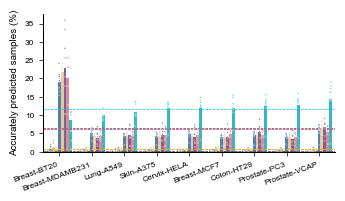

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager
font_dirs = ['/home/gonzag46/.fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype'] = 42  # Output Type 42 (TrueType), editable in Illustrator


# Extract the data for 'rankings' into a DataFrame
metric = 'percentage of samples with partially accurate predictions'
data = []
for cellline, metrics in performance.items():
    if metric in metrics:
        for method, values in metrics[metric].items():
            for value in values:
                data.append([cellline, method, value])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Cell Line', 'Method', metric])

# Calculate the mean 'rankings' for each cell line and method
df_mean = df.groupby(['Cell Line', 'Method']).mean().reset_index()
#Rename cell lines
df['Cancer Type'] = df['Cell Line'].map(cell_line_to_cancer_type)
df_mean['Cancer Type'] = df_mean['Cell Line'].map(cell_line_to_cancer_type)
# Replace x-axis labels with cancer types
df['Cell Line'] = df['Cancer Type']
df_mean['Cell Line'] = df_mean['Cancer Type']

# Order cell lines based on values for PDGrapher
pdgrapher_means = df_mean[df_mean['Method'] == 'PDGrapher'].sort_values(by=metric)  
ordered_cell_lines = pdgrapher_means['Cell Line']

# Reorder the DataFrame based on ordered cell lines
df['Cell Line'] = pd.Categorical(df['Cell Line'], categories=ordered_cell_lines, ordered=True)
df_mean['Cell Line'] = pd.Categorical(df_mean['Cell Line'], categories=ordered_cell_lines, ordered=True)


# Define a color palette that matches the existing figures
palette = {
    'Biolord': '#f3c283',
    'ChemCPA': '#2C70B9',
    'PDGrapher': '#04C4D9',
    'Cancer genes': '#636363',
    'Cancer targets': '#8C8C8C',
    'CellOT': '#6f4a8e',
    'Random': '#333333',
    'scGen': '#ED697D',
    'Perturbed genes': '#FFC000'
}

# Define the order of methods
method_order = ['Random', 'Cancer genes', 'Cancer targets', 'Perturbed genes', 'ChemCPA', 'Biolord', 'CellOT', 'scGen', 'PDGrapher']

with sns.plotting_context(plotting_context):
    # Initialize the plot
    fig, ax = plt.subplots(figsize=(3.543, 2.19))

    # Create a bar plot for each method
    sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)

    # Overlay individual data points
    sns.stripplot(data=df, x='Cell Line', y=metric, hue='Method', palette=palette, dodge=True, jitter=True, alpha=1.0, hue_order=method_order, size=1, edgecolor="white", linewidth=0.2)





    # Add horizontal lines for the overall mean ranking for each method
    for method in method_order:
        overall_mean = df[df['Method'] == method][metric].mean()
        plt.axhline(y=overall_mean, linestyle='--', color=palette[method], linewidth=0.5)

    # Remove title
    plt.title('')
    plt.ylim

    # Remove X-axis label
    plt.xlabel('')
    sns.despine()

    # Adjust legend to only include the bars and place it at the top
    handles, labels = plt.gca().get_legend_handles_labels()
    bar_handles = handles[:len(method_order)]
    bar_labels = labels[:len(method_order)]
    # plt.legend(bar_handles, bar_labels, bbox_to_anchor=(0.55, 1.20), loc='upper center', ncol=4, frameon=False, title=None)
    plt.subplots_adjust(right=0.95, bottom = 0.25)    
    plt.legend([], [], frameon=False)
    plt.xticks(rotation=20, ha="right")
    plt.ylabel('Accurately predicted samples (%)')
    plt.savefig(osp.join(outdir, 'panel_partially_accurate_pred.pdf'))
    plt.show()




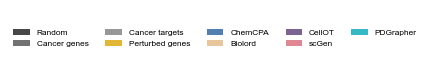

In [63]:
# Create a separate figure for the legend
with sns.plotting_context(plotting_context):
    fig_legend = plt.figure(figsize=(3.543, 0.73))  # Adjust size for the legend
    ax_legend = fig_legend.add_subplot(111)

    # Remove axis for the legend figure
    ax_legend.axis('off')

    # Create the legend using the handles and labels from the original plot
    legend = ax_legend.legend(bar_handles, bar_labels, loc='center', ncol=5, frameon=False, title=None)

    # Save the legend figure
    plt.savefig(osp.join(outdir, 'legend_only.pdf'), bbox_inches=None, pad_inches=0)

    # Show the legend-only figure
    plt.show()

In [64]:
df = df_mean
metric = 'percentage of samples with partially accurate predictions'
# Step 1: Filter out the data for PDGrapher
pdgrapher_df = df[df['Method'] == 'PDGrapher']

# Step 2: Identify the second-best method for each cell line
second_best_df = df[df['Method'] != 'PDGrapher'].copy()

# Group by cell line and find the second best method (highest value)
second_best_df = second_best_df.sort_values(by=['Cell Line', metric], ascending=False)
second_best_df = second_best_df.groupby('Cell Line').first().reset_index()

# Step 3: Merge the two DataFrames to compare PDGrapher with the second-best method
comparison_df = pd.merge(pdgrapher_df, second_best_df, on='Cell Line', suffixes=('_PDGrapher', '_SecondBest'))

# Step 4: Calculate the absolute difference
comparison_df['Difference'] = comparison_df[metric + '_PDGrapher'] - comparison_df[metric + '_SecondBest']

# Display the result
comparison_df = comparison_df[['Cell Line', 'Method_SecondBest', metric + '_PDGrapher', metric + '_SecondBest', 'Difference']]
comparison_df.sort_values(by = 'Difference', ascending = False)

,Cell Line,Method_SecondBest,percentage of samples with partially accurate predictions_PDGrapher,percentage of samples with partially accurate predictions_SecondBest,Difference
7,Prostate-PC3,scGen,12.811012,4.134941,8.676071
8,Prostate-VCAP,CellOT,14.362139,6.639566,7.722573
0,Skin-A375,scGen,11.862314,4.551693,7.310621
5,Breast-MCF7,scGen,11.931471,4.766031,7.165440
3,Cervix-HELA,ChemCPA,11.879521,4.743777,7.135743
4,Colon-HT29,CellOT,12.405878,5.318139,7.087739
1,Lung-A549,CellOT,10.933983,4.430836,6.503147
6,Breast-MDAMB231,ChemCPA,10.075887,5.066540,5.009347
2,Breast-BT20,CellOT,8.694141,22.756410,-14.062269


## Panel nDCG

/tmp/ipykernel_1188462/1310405955.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)


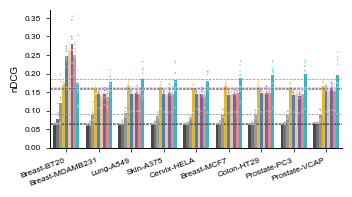

In [65]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Extract the data for 'rankings' into a DataFrame
metric = 'nDCG'
data = []
for cellline, metrics in performance.items():
    if metric in metrics:
        for method, values in metrics[metric].items():
            for value in values:
                data.append([cellline, method, value])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Cell Line', 'Method', metric])

# Calculate the mean 'rankings' for each cell line and method
df_mean = df.groupby(['Cell Line', 'Method']).mean().reset_index()
#Rename cell lines
df['Cancer Type'] = df['Cell Line'].map(cell_line_to_cancer_type)
df_mean['Cancer Type'] = df_mean['Cell Line'].map(cell_line_to_cancer_type)
# Replace x-axis labels with cancer types
df['Cell Line'] = df['Cancer Type']
df_mean['Cell Line'] = df_mean['Cancer Type']

# Order cell lines based on values for PDGrapher
# pdgrapher_means = df_mean[df_mean['Method'] == 'PDGrapher'].sort_values(by=metric)
# ordered_cell_lines = pdgrapher_means['Cell Line']

# Reorder the DataFrame based on ordered cell lines
df['Cell Line'] = pd.Categorical(df['Cell Line'], categories=ordered_cell_lines, ordered=True)
df_mean['Cell Line'] = pd.Categorical(df_mean['Cell Line'], categories=ordered_cell_lines, ordered=True)



# Define the order of methods
method_order = ['Random', 'Cancer genes', 'Cancer targets', 'Perturbed genes', 'ChemCPA', 'Biolord', 'CellOT', 'scGen', 'PDGrapher']

with sns.plotting_context(plotting_context):
    # Initialize the plot
    fig, ax = plt.subplots(figsize=(3.543, 2.19))

    # Create a bar plot for each method
    sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)

    # Overlay individual data points
    sns.stripplot(data=df, x='Cell Line', y=metric, hue='Method', palette=palette, dodge=True, jitter=True, alpha=1.0, hue_order=method_order, size=1, edgecolor="white", linewidth=0.2)



    # Add horizontal lines for the overall mean ranking for each method
    for method in method_order:
        overall_mean = df[df['Method'] == method][metric].mean()
        plt.axhline(y=overall_mean, linestyle='--', color=palette[method], linewidth=0.5)

    # Remove title
    plt.title('')
    plt.ylim

    # Remove X-axis label
    plt.xlabel('')
    sns.despine()

    # Adjust legend to only include the bars and place it at the top
    handles, labels = plt.gca().get_legend_handles_labels()
    bar_handles = handles[:len(method_order)]
    bar_labels = labels[:len(method_order)]
    # plt.legend(bar_handles, bar_labels, bbox_to_anchor=(0.55, 1.20), loc='upper center', ncol=4, frameon=False, title=None)
    plt.subplots_adjust(right=0.95, bottom = 0.25)
    plt.legend([], [], frameon=False)
    plt.xticks(rotation=20, ha="right")
    plt.ylabel('nDCG')
    plt.savefig(osp.join(outdir, 'panel_ndcg.pdf'))
    plt.show()


In [66]:
df = df_mean
metric = 'nDCG'
# Step 1: Filter out the data for PDGrapher
pdgrapher_df = df[df['Method'] == 'PDGrapher']

# Step 2: Identify the second-best method for each cell line
second_best_df = df[df['Method'] != 'PDGrapher'].copy()

# Group by cell line and find the second best method (highest value)
second_best_df = second_best_df.sort_values(by=['Cell Line', metric], ascending=False)
second_best_df = second_best_df.groupby('Cell Line').first().reset_index()

# Step 3: Merge the two DataFrames to compare PDGrapher with the second-best method
comparison_df = pd.merge(pdgrapher_df, second_best_df, on='Cell Line', suffixes=('_PDGrapher', '_SecondBest'))

# Step 4: Calculate the absolute difference
comparison_df['Difference'] = comparison_df[metric + '_PDGrapher'] - comparison_df[metric + '_SecondBest']

# Display the result
comparison_df = comparison_df[['Cell Line', 'Method_SecondBest', metric + '_PDGrapher', metric + '_SecondBest', 'Difference']]
comparison_df.sort_values(by = 'Difference', ascending = False)



,Cell Line,Method_SecondBest,nDCG_PDGrapher,nDCG_SecondBest,Difference
7,Prostate-PC3,Perturbed genes,0.197902,0.163855,0.034047
4,Colon-HT29,Perturbed genes,0.196979,0.163128,0.033851
8,Prostate-VCAP,Perturbed genes,0.195813,0.166291,0.029522
5,Breast-MCF7,Perturbed genes,0.186627,0.165365,0.021261
3,Cervix-HELA,Perturbed genes,0.180946,0.160050,0.020895
0,Skin-A375,Perturbed genes,0.183065,0.163878,0.019187
1,Lung-A549,Perturbed genes,0.184271,0.165421,0.018849
6,Breast-MDAMB231,Perturbed genes,0.176563,0.161788,0.014774
2,Breast-BT20,CellOT,0.173448,0.279853,-0.106405


## Panel aggregated recall@k

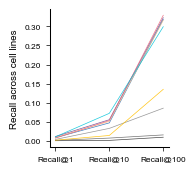

In [67]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize an empty list to store the data
data = []

# Iterate over the performance dictionary to extract all recall metrics
for cellline, metrics in performance.items():
    for metric in ['recall@1', 'recall@10', 'recall@100']:
        if metric in metrics:
            for method, values in metrics[metric].items():
                for value in values:
                    data.append([cellline, metric, method, value])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Cell Line', 'Metric', 'Method', 'Value'])

# Convert the 'Value' column to numeric to avoid any conversion issues
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Calculate the mean for each method and metric across all cell lines
df_mean = df.groupby(['Metric', 'Method'])['Value'].mean().reset_index()



# Define the order of methods
method_order = ['Random', 'Cancer genes', 'Cancer targets', 'Perturbed genes', 'ChemCPA', 'Biolord', 'CellOT', 'scGen', 'PDGrapher']
df_mean['Metric'] = [e.capitalize() for e in df_mean['Metric']]
with sns.plotting_context(plotting_context):
    # Initialize the plot
    fig, ax = plt.subplots(figsize=(1.7715, 2.19))

    # Create a line plot for each method showing the mean across all cell lines
    sns.lineplot(data=df_mean, x='Metric', y='Value', hue='Method', palette=palette, hue_order=method_order, markers=True, dashes=False, alpha=0.9)

    # Remove X-axis label
    plt.xlabel('')

    sns.despine()

    # Adjust legend to place it at the top
    handles, labels = plt.gca().get_legend_handles_labels()
    line_handles =  handles[:len(method_order)]
    line_labels = labels[:len(method_order)]
    plt.legend([], [], frameon=False)
    # plt.subplots_adjust(top=0.9)
    plt.subplots_adjust(right=0.9, bottom = 0.25, left=0.23)
    plt.ylabel('Recall across cell lines')
    plt.savefig(osp.join(outdir, 'aggregated_mean_recall_metrics.pdf'))
    plt.show()


## Panel all metrics ranking

/tmp/ipykernel_1188462/886862549.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Methods', y='rank', data=df, order=method_order, palette=palette, showfliers=False, linewidth=0.5)


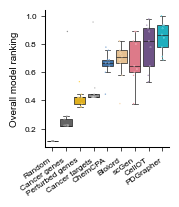

In [68]:
df = pd.read_csv(osp.join(base_path, 'v2/rank_table_chemical_cross_v2_full.csv'))
df = df.groupby(['Methods', 'Cellline']).mean().reset_index()

# Rename the methods in the 'Methods' column
df['Methods'] = df['Methods'].replace({
    'BL Rand Cancer Genes': 'Cancer genes',
    'BL Rand Cancer Target': 'Cancer targets',
    'BL Rand Random': 'Random',
    'BL Rand Pert Genes': 'Perturbed genes',
    'chemCPA': 'ChemCPA',
    'PDgrapher': 'PDGrapher',
    'scGEN': 'scGen'
})

df['rank'] = df['rank']/len(df.Methods.unique())

import matplotlib.pyplot as plt
import seaborn as sns


# Order of methods
# method_order = ['Random', 'Cancer genes', 'Cancer targets', 'ChemCPA', 'CellOT', 'Biolord', 'scGen', 'PDGrapher']
# Calculate the mean rank for each method
mean_rank = df.groupby('Methods')['rank'].mean().reset_index()

# Sort the methods based on mean rank
method_order = mean_rank.sort_values('rank')['Methods'].tolist()
with sns.plotting_context(plotting_context):
    # Initialize the plot
    fig, ax = plt.subplots(figsize=(1.7715, 2.19))
    # Create the box plot with method order and custom palette
    sns.boxplot(x='Methods', y='rank', data=df, order=method_order, palette=palette, showfliers=False, linewidth=0.5)

    # Add individual data points with matching colors
    sns.stripplot(x='Methods', y='rank', data=df, hue='Methods', alpha=0.8, hue_order=method_order, palette=palette, edgecolor="white", linewidth=0.2, size=1, jitter=0.15)

    # Remove the legend for the stripplot
    plt.legend([], [], frameon=False)

    # Show the plot
    plt.title('')
    plt.ylabel('Overall model ranking')
    plt.xlabel('')
    plt.subplots_adjust(right=0.9, bottom = 0.25, left=0.2)
    plt.xticks(rotation=35, ha="right")

    sns.despine()
    
    plt.savefig(osp.join(outdir, 'panel_all_metrics_ranking.pdf'))
    plt.show()



In [69]:
#Append ranking values to Excel file of source dat

df = pd.read_csv(osp.join(base_path, 'v2/rank_table_chemical_cross_v2_full.csv'))
# Rename the methods in the 'Methods' column
df['Methods'] = df['Methods'].replace({
    'BL Rand Cancer Genes': 'Cancer genes',
    'BL Rand Cancer Target': 'Cancer targets',
    'BL Rand Random': 'Random',
    'BL Rand Pert Genes': 'Perturbed genes',
    'chemCPA': 'ChemCPA',
    'PDgrapher': 'PDGrapher',
    'scGEN': 'scGen'
})

df = df.groupby(['Methods', 'Cellline'])['rank'].mean().reset_index()
df.rename(columns={'Methods': 'Model', 'Cellline': 'Cell line', 'rank':'Rank'}, inplace=True)

df = df[['Cell line', 'Model', 'Rank']]

# Load the existing Excel file and append a new sheet
with pd.ExcelWriter(osp.join(outdir, "PDGrapher_SourceData_Fig4.xlsx"), mode='a', engine='openpyxl') as writer:
    df.to_excel(writer, sheet_name="Panel D", index=False)

## Panels distance between predicted genes and GT genes in the PPI (PDGrapher vs random)

In [70]:
outdir = 'distance_predicted_targets_and_gt'
os.makedirs(outdir, exist_ok=True)

cell_lines = ["A549", "A375", "BT20", "HELA", "HT29", "MCF7", "MDAMB231", "PC3", "VCAP"]


all_lengths_ours_to_real = {c: [] for c in cell_lines}
all_lengths_random_to_real = {c: [] for c in cell_lines}
cell_line_path_dict = {}


if not osp.exists(osp.join(outdir, 'all_ours_to_real.pickle')):
    
    for cell_line in cell_lines:
        
        #Loads edge index 
        base_path = "../../data/processed/torch_data/chemical/real_lognorm"
        path_edge_index = osp.join(base_path, 'edge_index_{}.pt'.format(cell_line))
        edge_index = torch.load(path_edge_index)
        G = nx.Graph() 
        G.add_edges_from(tuple(zip(edge_index[0,:].tolist(), edge_index[1,:].tolist())))

        #For each cell line, I take the best model, and take the retrieved and real interventions (these are for the remaining cell lines)
        #Then I proceed to compute distances
        performance = pd.read_csv('../../results_metrics_aggregated_bme/perturbagen_pred/PDgrapher/within/chemical/val/{}_drugpred_within_best.csv'.format(cell_line))
        
        ngnn = performance[performance['Set'] == 'Test']['GNN'].iloc[0]
        model_path = glob('../../experiments_resubmission_bme/results/chemical/{}_corrected_pos_emb/n_gnn_{}*'.format(cell_line, ngnn))[0]
        
        
        our_predicted_interventions_all_test = pickle.load(open(osp.join(model_path, 'retrieved_interventions_cross.pkl'), "rb"))
        our_real_interventions_all_test = pickle.load(open(osp.join(model_path, 'real_interventions_cross.pkl'), "rb"))
        

        #Sanity checks
        for i in our_real_interventions_all_test.keys():
            for j in our_real_interventions_all_test[i].keys():
                assert len(our_predicted_interventions_all_test[i][j]) == len(our_real_interventions_all_test[i][j]), "predicted and real interventions should have the same length (our model)"

        
        
        for cell_line_test in our_predicted_interventions_all_test:
            #Outpath
            outpath = osp.join(outdir, '{}'.format(cell_line_test))
            os.makedirs(outpath, exist_ok=True)
            cell_line_path_dict[cell_line] = outpath
            
            
            our_predicted_interventions = our_predicted_interventions_all_test[cell_line_test]
            our_real_interventions = our_real_interventions_all_test[cell_line_test]
            
            #Loads the random predictions for the test cell line
            random_path = '../../baselines/mechanistic/results/mechanistic/baseline_random_chemical/new_cell_line/random/{}/random'.format(cell_line_test)
            random_predicted_interventions = pickle.load(open(osp.join(random_path, 'retrieved_interventions.pkl'), "rb"))
            random_real_interventions = pickle.load(open(osp.join(random_path, 'real_interventions.pkl'), "rb"))
            
            # import pdb; pdb.set_trace()
            #Sanity checks
            for i in our_predicted_interventions.keys():
                    assert len(random_predicted_interventions[i]) == len(random_real_interventions[i]), "predicted and real interventions should have the same length (random model)"
                    assert len(random_predicted_interventions[i]) == len(our_real_interventions[i]), "our model and random model should have the same length"
            
            
            #Computes the distances if not pre-saved
            if not os.path.exists(osp.join(outpath, 'random_to_real.txt')):
                length = dict(nx.all_pairs_shortest_path_length(G))
                lengths_ours_to_real = []
                lengths_random_to_real = []
                for split_index in our_predicted_interventions.keys():
                    pred_ours = our_predicted_interventions[split_index]
                    pred_random = random_predicted_interventions[split_index]
                    real = our_real_interventions[split_index]
                    
                    #Subsets to 10% of samples (randomly selected) for computational tractability
                    selected_indices = random.sample(range(len(pred_ours)), int(0.1 * len(pred_ours)))
                    pred_ours = [pred_ours[i] for i in selected_indices]
                    pred_random = [pred_random[i] for i in selected_indices]
                    real = [real[i] for i in selected_indices]
                    
                    
                    for i in range(len(pred_ours)):
                        pred_ours_i = pred_ours[i]
                        pred_random_i = pred_random[i]
                        real_i = real[i]
                        for j in range(len(real_i)):
                            for jj in range(len(real_i)):
                                lengths_ours_to_real.append(length[real_i[j]][pred_ours_i[jj]])
                                lengths_random_to_real.append(length[real_i[j]][pred_random_i[jj]])
            all_lengths_ours_to_real[cell_line_test] += lengths_ours_to_real
            all_lengths_random_to_real[cell_line_test] += lengths_random_to_real

    with open(osp.join(outdir, 'all_ours_to_real.pickle'), 'wb') as f:
        pickle.dump(all_lengths_ours_to_real, f)

    with open(osp.join(outdir, 'all_random_to_real.pickle'), 'wb') as f:
        pickle.dump(all_lengths_random_to_real, f)
        
else:
    with open(osp.join(outdir, 'all_ours_to_real.pickle'), 'rb') as f:
        all_lengths_ours_to_real = pickle.load(f)

    with open(osp.join(outdir, 'all_random_to_real.pickle'), 'rb') as f:
        all_lengths_random_to_real = pickle.load(f)

Average difference PDGrapher vs Random for A549: 2.73 vs 3.05
Average difference PDGrapher vs Random for A375: 2.80 vs 3.15
Average difference PDGrapher vs Random for BT20: 2.47 vs 2.79
Average difference PDGrapher vs Random for HELA: 2.82 vs 3.19
Average difference PDGrapher vs Random for HT29: 2.75 vs 3.12
Average difference PDGrapher vs Random for MCF7: 2.70 vs 3.06
Average difference PDGrapher vs Random for MDAMB231: 2.75 vs 3.10
Average difference PDGrapher vs Random for PC3: 2.75 vs 3.13
Average difference PDGrapher vs Random for VCAP: 2.79 vs 3.15


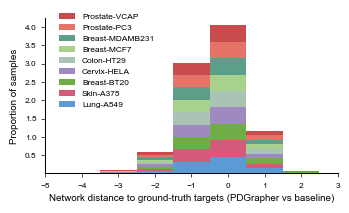

In [71]:
####Stacked histogram of the distances of PDGrapher - Random for all cell lines togheter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

cell_lines = list(all_lengths_ours_to_real.keys())

# Predefined colors for each cell line
cell_line_colors = {
    'VCAP': '#C94C4C',   # Deep Red
    'PC3': '#E57368',  # Coral Red
    'HT29': '#A9C4B4',  # Mint Green
    'HELA': '#9E8ABF',  # Lavender Purple
    'MDAMB231': '#5B9E89',  # Teal
    'MCF7': '#A9D18E',  # Light Green
    'BT20': '#70AD47',  # Olive Green
    'A375': '#D45A79',  # Dusty Rose (replaces orange)
    'A549': '#5B9BD5',  # Medium Blue
    
}
# Set up the bins based on the possible range of differences
all_differences = []

for cell_line in cell_lines:
    lengths_ours_to_real = all_lengths_ours_to_real[cell_line]
    lengths_random_to_real = all_lengths_random_to_real[cell_line]
    
    # Compute the element-wise difference (random - ours)
    difference_lengths =  np.array(lengths_ours_to_real) - np.array(lengths_random_to_real)
    all_differences.extend(difference_lengths)

bins = np.arange(min(all_differences), max(all_differences) + 1) - 0.5

with sns.plotting_context(plotting_context):
    # Set up the plot
    fig, ax = plt.subplots(figsize=(3.543, 2.19))

    # Plot stacked histogram
    bottoms = np.zeros(len(bins) - 1)

    for cell_line in cell_lines:
        lengths_ours_to_real = all_lengths_ours_to_real[cell_line]
        lengths_random_to_real = all_lengths_random_to_real[cell_line]
        
        # Compute the element-wise difference (random - ours)
        difference_lengths = np.array(lengths_ours_to_real) - np.array(lengths_random_to_real)
        
        # Calculate the histogram counts
        counts, _ = np.histogram(difference_lengths, bins=bins)
        
        # Normalize to get proportions
        proportions = counts / np.sum(counts)
        
        # Plot the proportion-based histogram for this cell line
        ax.bar(bins[:-1] + 0.5, proportions, bottom=bottoms, width=1.0, color=cell_line_colors[cell_line], label=cell_line_to_cancer_type[cell_line])
        
        # Update the bottom position for the next stack
        bottoms += proportions
        print('Average difference PDGrapher vs Random for {}: {:.2f} vs {:.2f}'.format(cell_line, np.mean(lengths_ours_to_real), np.mean(lengths_random_to_real)))

    # Adding labels and title
    ax.set_xlabel('Network distance to ground-truth targets (PDGrapher vs baseline)')
    ax.set_ylabel('Proportion of samples')
    ax.set_title('')
    ax.set_xlim(-5, 3)

    
    # Reverse the order of handles and labels
    handles, labels = ax.get_legend_handles_labels()
    handles = handles[::-1]
    labels = labels[::-1]

    
    
    # Customize the legend
    ax.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.02, 1.08), frameon=False, title=None)
    sns.despine()
    # ax.yaxis.set_minor_locator(AutoMinorLocator(4))  # Add 2 minor ticks between major y ticks
    # ax.tick_params(axis='both', which='minor', length=4, color='gray')  # Style the minor ticks
    plt.subplots_adjust(bottom=0.17, right=0.95)
    plt.savefig(osp.join(outdir, 'stacked_histogram_proportion_difference_random_pdgrapher.pdf'), transparent=True)
    plt.show()


In [72]:
# Prepare bin centers
bin_centers = bins[:-1] + 0.5

# Build a dict with proportions per cell line
hist_data = {'Bin center': bin_centers}
for cell_line in cell_lines:
    diff = np.array(all_lengths_ours_to_real[cell_line]) - np.array(all_lengths_random_to_real[cell_line])
    counts, _ = np.histogram(diff, bins=bins)
    proportions = counts / np.sum(counts)
    hist_data[cell_line] = proportions

# Convert to DataFrame
df_hist = pd.DataFrame(hist_data)

df_hist.index = df_hist['Bin center']
df_hist = df_hist.loc[[-4, -3, -2, -1, 0, 1, 2]]
df_hist = df_hist.round(3)

# Save to Excel (append to your existing file)
with pd.ExcelWriter(osp.join('processed', "PDGrapher_SourceData_Fig4.xlsx"), mode='a', engine='openpyxl', if_sheet_exists='replace') as writer:
    df_hist.to_excel(writer, sheet_name="Panel E", index=False)
    
from openpyxl import load_workbook
from openpyxl.styles import numbers
# Apply number format via openpyxl
wb = load_workbook(osp.join('processed', "PDGrapher_SourceData_Fig4.xlsx"))
ws = wb["Panel E"]

# Skip header row (row 1), format numeric columns
for row in ws.iter_rows(min_row=2):
    for cell in row:
        if isinstance(cell.value, (int, float)):
            cell.number_format = '0.000'

wb.save(osp.join('processed', "PDGrapher_SourceData_Fig4.xlsx"))

In [73]:
df_hist

,Bin center,A549,A375,BT20,HELA,HT29,MCF7,MDAMB231,PC3,VCAP
Bin center,,,,,,,,,,
-4.0,-4.0,0.002,0.002,0.000,0.003,0.003,0.002,0.002,0.003,0.003
-3.0,-3.0,0.009,0.009,0.006,0.010,0.010,0.009,0.009,0.010,0.010
-2.0,-2.0,0.060,0.062,0.060,0.065,0.066,0.065,0.064,0.066,0.065
-1.0,-1.0,0.324,0.335,0.333,0.341,0.342,0.339,0.337,0.342,0.335
0.0,0.0,0.457,0.452,0.449,0.446,0.448,0.446,0.449,0.448,0.450
1.0,1.0,0.139,0.130,0.144,0.126,0.123,0.130,0.130,0.123,0.127
2.0,2.0,0.009,0.009,0.007,0.009,0.008,0.008,0.008,0.007,0.009


In [74]:

# #Put all data together
# lengths_ours_to_real = np.concatenate([all_lengths_ours_to_real[e] for e in all_lengths_ours_to_real]).tolist()
# lengths_random_to_real = np.concatenate([all_lengths_random_to_real[e] for e in all_lengths_random_to_real]).tolist()
# data = pd.DataFrame([lengths_ours_to_real + lengths_random_to_real, ['PDGrapher' for i in range(len(lengths_ours_to_real))] + ['Random' for i in range(len(lengths_random_to_real))]]).transpose()
# data.columns = ['distance', 'Model']

# colors = ['#04C4D9', '#333333']

# with sns.plotting_context(plotting_context_small):
#     sns.set_palette(sns.color_palette(colors))

#     weights_ours = np.ones_like(lengths_ours_to_real) / len(lengths_ours_to_real)
#     weights_random = np.ones_like(lengths_random_to_real) / len(lengths_random_to_real)
#     weights = np.concatenate([weights_ours, weights_random])
#     data['weights'] = weights
#     ax = sns.displot(data, x="distance", hue='Model', multiple='dodge', discrete=True, alpha = 0.8, weights='weights', height=1.7, aspect=0.7)

#     ax.set(xlabel='Shortest-path length', ylabel='Proportion of samples')
#     sns.move_legend(
#                         ax, "lower left",
#                         bbox_to_anchor=(.58, 0.7), ncol=1, title=None, frameon=False,
#                     )
#     plt.subplots_adjust(top=0.9, right=0.92, left=0.2)
#     plt.savefig(osp.join(outpath, '../../panel_distribution_network_distance_model_vs_random_alltogether.pdf'.format(cell_line)), transparent=True)
#     plt.close()

In [75]:

# #Individual plots

# for cell_line in all_lengths_ours_to_real.keys():
#     lengths_ours_to_real = all_lengths_ours_to_real[cell_line]
#     lengths_random_to_real = all_lengths_random_to_real[cell_line]
    
#     data = pd.DataFrame([lengths_ours_to_real + lengths_random_to_real, ['PDGrapher' for i in range(len(lengths_ours_to_real))] + ['Random' for i in range(len(lengths_random_to_real))]]).transpose()
#     data.columns = ['distance', 'Model']

#     colors = ['#04C4D9', '#333333']

#     with sns.plotting_context(plotting_context_small):
#         sns.set_palette(sns.color_palette(colors))

#         weights_ours = np.ones_like(lengths_ours_to_real) / len(lengths_ours_to_real)
#         weights_random = np.ones_like(lengths_random_to_real) / len(lengths_random_to_real)
#         weights = np.concatenate([weights_ours, weights_random])
#         data['weights'] = weights
#         ax = sns.displot(data, x="distance", hue='Model', multiple='dodge', discrete=True, alpha = 0.8, weights='weights', height=1.7, aspect=0.7)

#         ax.set(xlabel='Shortest-path length', ylabel='Proportion of samples')
#         sns.move_legend(
#                             ax, "lower left",
#                             bbox_to_anchor=(.58, 0.7), ncol=1, title=None, frameon=False,
#                         )
#         plt.subplots_adjust(top=0.9, right=0.92, left=0.2)
#         plt.savefig(osp.join(cell_line_path_dict[cell_line], 'panel_distribution_network_distance_model_vs_random_{}.pdf'.format(cell_line)), transparent=True)
#         plt.close()
            